# Titanic

## Otázky a úkoly:

1. O kolika pasažérech Titanicu víme?
2. Kolik procent jich přežilo?
3. Kolik procent žen přežilo? Kolik procent mužů?
4. Pro každou třídu vypište kolik pasažérů dané třídy nastoupilo na loď, kolik jich přežilo, a kolik to dělá procent přeživších.
5. Vykreslete graf procenta přeživších podle dekády věku (t.j. procento pro 0-9 let, 10-19 let, atd.).
6. Závisí na sobě třída a věk pasažéra? Jak? Vykreslete graf(y), které tuto závislost znázorňují.

In [1]:
import pandas
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

# Zapnout zobrazování grafů (procento uvozuje „magickou” zkratku IPythonu):
%matplotlib inline

In [2]:
passengers = pandas.read_csv('dataset.csv', index_col=0)

## O kolika pasažérech Titanicu víme?

In [3]:
passenger_cnt = len(passengers)
passenger_cnt

1313

## Kolik procent jich přežilo?

In [4]:
survived_passengers = passengers.loc[passengers['Survived'] == 1]
survived_passenger_cnt = len(survived_passengers)
survived_passenger_cnt/passenger_cnt*100

34.27265803503427

## Kolik procent žen přežilo?

In [5]:
women = passengers.loc[passengers['Sex'] == 'female']
len(women.loc[women['Survived'] == 1])/len(women)*100

66.66666666666666

## Kolik procent mužů přežilo?

In [6]:
men = passengers.loc[passengers['Sex'] == 'male']
len(men.loc[men['Survived'] == 1])/len(men)*100

16.686251468860164

## Pro každou třídu vypište kolik pasažérů dané třídy nastoupilo na loď, kolik jich přežilo, a kolik to dělá procent přeživších.

In [7]:
# passengers_by_class
pbc = passengers.groupby('PClass')['Name'].count()
pbc_frame = pbc.rename('passengers').loc[['1st','2nd','3rd']].to_frame()

# survived_passengers_by_class
spbc = survived_passengers.groupby('PClass')['Name'].count()
spbc_frame = spbc.rename('survived passengers').to_frame()

# ratio
ratio_frame = spbc.apply(lambda x: (x/survived_passenger_cnt*100)).rename('% of survivors')

pandas.concat([pbc_frame, spbc_frame, ratio_frame], axis=1, join_axes=[pbc_frame.index])

,passengers,survived passengers,% of survivors
PClass,,,
1st,322,193,42.888889
2nd,279,119,26.444444
3rd,711,138,30.666667


## Vykreslete graf procenta přeživších podle dekády věku (t.j. procento pro 0-9 let, 10-19 let, atd.).

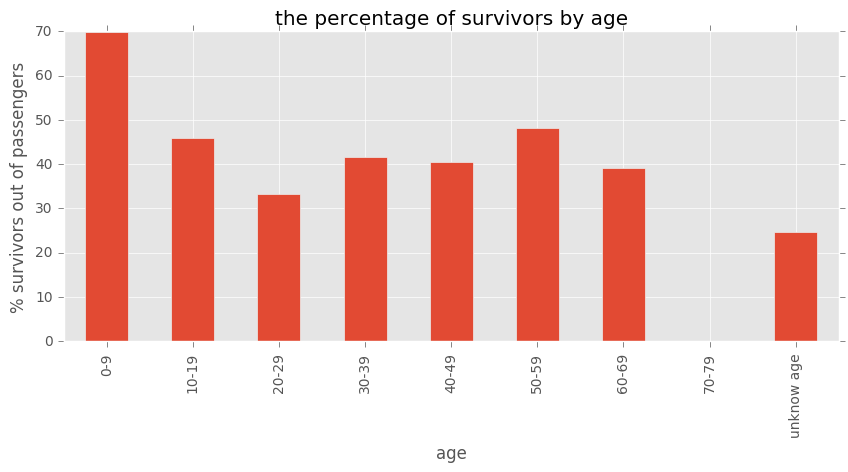

In [8]:
def get_range(age):
    if not age:
        return "unknow age"
    min = int(age // 10 * 10)
    max = min + 9
    return (str(min) + "-" + str(max))

sp = survived_passengers.loc[:, 'Age'].fillna(False).apply(lambda x: get_range(x))
sp_by_range = sp.to_frame().groupby('Age')['Age'].count()

p = passengers.loc[:, 'Age'].fillna(False).apply(lambda x: get_range(x))
p_by_range = p.to_frame().groupby('Age')['Age'].count()

counts = pandas.DataFrame({"s": sp_by_range, "p": p_by_range}).fillna(0)
counts['ratio'] = counts['s']/counts['p']*100

plot = counts.loc[:, 'ratio'].plot.bar(
    legend=False, title="the percentage of survivors by age", figsize=(10,4)
)
plot.set_ylabel('% survivors out of passengers')
plot.set_xlabel('age')
matplotlib.pyplot.show()


## Závisí na sobě třída a věk pasažéra? Jak? Vykreslete graf(y), které tuto závislost znázorňují.

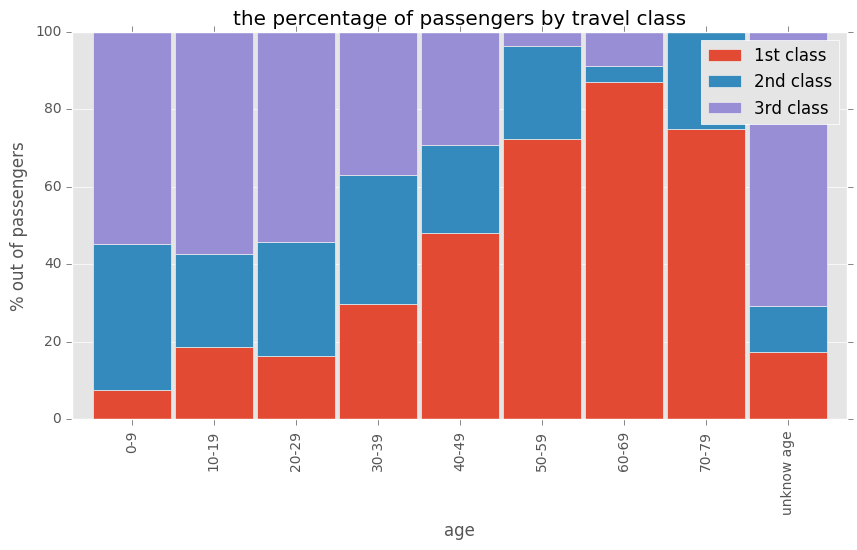

In [9]:
first_class = passengers.loc[:, 'Age'].loc[passengers['PClass'] == '1st'].fillna(False).apply(
    lambda x: get_range(x)
)
second_class = passengers.loc[:, 'Age'].loc[passengers['PClass'] == '2nd'].fillna(False).apply(
    lambda x: get_range(x)
)
third_class = passengers.loc[:, 'Age'].loc[passengers['PClass'] == '3rd'].fillna(False).apply(
    lambda x: get_range(x)
)

c1_by_range = first_class.to_frame().groupby('Age')['Age'].count().astype(float)
c2_by_range = second_class.to_frame().groupby('Age')['Age'].count().astype(float)
c3_by_range = third_class.to_frame().groupby('Age')['Age'].count().astype(float)

data = pandas.DataFrame({
        "1st": c1_by_range,
        "2nd": c2_by_range,
        "3rd": c3_by_range
}).fillna(0)

data['sum'] = data.loc[:, '1st'] + data.loc[:, '2nd'] + data.loc[:, '3rd']
data['1st class'] = data.loc[:, '1st'] / data.loc[:, 'sum'] * 100
data['2nd class'] = data.loc[:, '2nd'] / data.loc[:, 'sum'] * 100
data['3rd class'] = data.loc[:, '3rd'] / data.loc[:, 'sum'] * 100

data = data.loc[:, ['1st class', '2nd class', '3rd class']]

plot = data.plot.bar(
    legend=True, title="the percentage of passengers by travel class",
    figsize=(10,5), stacked=True, width=0.95
)
plot.set_ylabel('% out of passengers')
plot.set_xlabel('age')
matplotlib.pyplot.show()

Na grafu si můžeme všimnout roustoucí tendence starších pasažérů v první třídě. Naopak druhá a především  třetí třída byla naplněna mladšími lidmi. Je zřetelně vidět obměna tříd v rámci věkové kategorie postupem od nejmladší k nejstarší.

V posledním sloupci si můžeme všimnout faktu, že velká část pasažérů s neznámým věkem cestovala ve třetí třídě.